In [1]:
#SETTING PATH 
path="/sharedFolder/Data/1_HTGTS/13_Revision1/"
results="/sharedFolder/Results/Hotspot/Revision1/Idelalisib/FULL"
previousResults="/sharedFolder/Results/Hotspot/Revision1/FULL/7/"
dir.create(results,recursive=TRUE)
riderPath="/home/Riderv2/"
install.packages("beeswarm")
library(beeswarm)


Warning message in dir.create(results, recursive = TRUE):
“'/sharedFolder/Results/Hotspot/Revision1/Idelalisib/FULL' already exists”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
#LOAD USEFULL FUNCTIONS 
noExt=function(x){
return(tools::file_path_sans_ext(x))
}
bnoExt=function(x){
return(basename(tools::file_path_sans_ext(x)))
}
fNumber=function(x){
sapply(x,FUN=function(x){
strsplit(x,"__")[[1]][2]
})
}
rRider=function(x){
sapply(x,FUN=function(x){
strsplit(x,"-RIDER")[[1]][1]
})
}
# centering with 'scale()'
center_scale <- function(x) {
    scale(x, scale = FALSE)
}

In [3]:
#LOAD LIBRARIES 
library("argparser");
library(gtools);
library("GenomicRanges");
library("ggVennDiagram");
options(warn=-1)
library(GenomicRanges)

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    I, expand.grid, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb



In [4]:
#Load Data
Database=read.table(paste(previousResults,"Database.csv",sep="/"),header=TRUE,sep=",")
a=list.files(path,pattern=".bed",recursive=TRUE)
a=mixedsort(a)
a2=sapply(a,FUN=function(x){strsplit(x,".bed")[[1]][1]})
a2=sapply(a2,FUN=function(x){strsplit(x,"__")[[1]][2]})

In [5]:
print("Idelalisib ANALYSIS")
dir.create(results,recursive=TRUE)

[1] "Idelalisib ANALYSIS"


In [6]:
Database=read.table(paste(previousResults,"Database.csv",sep="/"),header=TRUE,sep=",")
DatabaseTEMP=Database[grep("WT",Database[,6]),]
DatabaseTEMP2=Database[grep("Idelalisib",Database[,6]),]

Database=rbind(DatabaseTEMP2,DatabaseTEMP)
a=list.files(path,pattern=".bed",recursive=TRUE)
a=mixedsort(a)
a2=sapply(a,FUN=function(x){strsplit(x,".bed")[[1]][1]})
a2=sapply(a2,FUN=function(x){strsplit(x,"__")[[1]][2]})
a2=c(a2[grep("WT",a2)],a2[grep("KO",a2)],a2[grep("Idelalisib",a2)])
a=c(a[grep("WT",a)],a[grep("KO",a)],a[grep("Idelalisib",a)])

In [7]:
hgtgts_count=matrix(0,ncol=length(unique(Database[,7])),nrow=length(a2))
colnames(hgtgts_count)=sapply(unique(Database[,7]),FUN=toString)
rownames(hgtgts_count)=a2
hgtgts_rpm=hgtgts_count
hgtgts_fpkm=hgtgts_count
for(j in a){
    system(paste("echo",j))
temp=read.table(paste(path,"/",j,sep=""),sep="\t")
tempGG=GRanges(seqnames=as.matrix(temp[,1]),ranges=IRanges(start = as.numeric(temp[,2]),end=as.numeric(temp[,3])))    
    for(i in seq(nrow(Database))){
        system(paste("echo",i/nrow(Database)))
        gg=GRanges(seqnames=as.matrix(Database[i,1]),ranges=IRanges(start = as.numeric(Database[i,2]),end=as.numeric(Database[i,3])))    
        over=countOverlaps(gg,tempGG)
        name=as.vector(noExt(fNumber(j)))
        hgtgts_count[name,toString(Database[i,7])]= over
        hgtgts_rpm[name,toString(Database[i,7])]= ((over)/nrow(temp))*1000000

   }

}
dir.create(paste(results,"/RPMCOmparison/",sep=""))

hgtgts_rpmDMSO=hgtgts_rpm[,sort((hgtgts_rpm["MEC-1_Idelalisib_DMSO",]+0.00000001)/(hgtgts_rpm["AID-WT_DMSO",]+0.00000001),index.return=TRUE,decreasing=TRUE)$ix]

write.table((t(hgtgts_rpmDMSO)),paste(results,"/RPMCOmparison/","rpm_hgtgtsHeatmapDMSO7.csv",sep=""),col.names=NA,sep=",")
write.table(t(hgtgts_rpm),paste(results,"/RPMCOmparison/","rpm_hgtgtsHeatmap7.csv",sep=""),col.names=NA,sep=",")


write.table((t(hgtgts_count)),paste(results,"/RPMCOmparison/","count_hgtgts7.csv",sep=""),col.names=NA,sep=",")


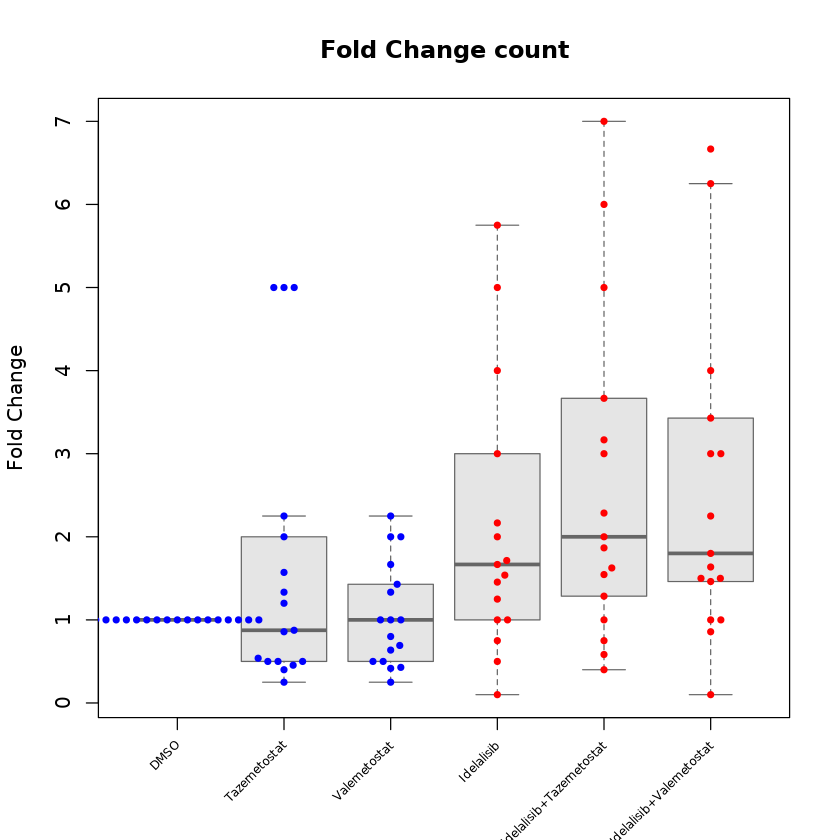

In [20]:
data <- read.csv(paste(results,"/RPMCOmparison/","count_hgtgts7.csv",sep=""), header = TRUE, row.names = 1, sep = ",")
data=data+1
# Calcolo del fold change tra DMSO Idelalisib e DMSO WT
foldChange_IDE_DMSO <- data[,"MEC.1_Idelalisib_DMSO"] / data[,"AID.WT_DMSO"]
foldChange_IDE_Taze <- data[,"MEC.1_Idelalisib_Tazemetostat"] / data[,"AID.WT_DMSO"]
foldChange_IDE_Vale <- data[,"MEC.1_Idelalisib_Valemetostat"] / data[,"AID.WT_DMSO"]
foldChange_AID_WT_Taze <- data[,"AID.WT_Tazemetostat"] / data[,"AID.WT_DMSO"]
foldChange_AID_WT_Vale <- data[,"AID.WT_Valemetostat"] / data[,"AID.WT_DMSO"]
dmso_WT <- data[,"AID.WT_DMSO"] / data[,"AID.WT_DMSO"]
# Creazione della tabella con i fold change
foldChange_table <- data.frame(DMSO_WT=dmso_WT,Taze_WT=foldChange_AID_WT_Taze,Vale_WT=foldChange_AID_WT_Vale,DMSO_IDE = foldChange_IDE_DMSO, Taze_IDE = foldChange_IDE_Taze, Vale_IDE = foldChange_IDE_Vale)
colnames(foldChange_table)=c("DMSO","Tazemetostat","Valemetostat","Idelalisib","Idelalisib+Tazemetostat","Idelalisib+Valemetostat")
# Creazione del boxplot per i fold change
boxplot(foldChange_table, xaxt = "n", main = "Fold Change count", xlab = "", 
        ylab = "Fold Change", outline = FALSE, col = "gray90", border = "gray40")


# Aggiungi i puntini con beeswarm
for (i in 1:ncol(foldChange_table)) {
  color <- if (grepl("Idelalisib", colnames(foldChange_table)[i], ignore.case = TRUE)) "red" else "blue"
  
  beeswarm(foldChange_table[[i]], add = TRUE, at = i, 
           col = color, pch = 20, vertical = TRUE)
}



# Aggiungi le etichette ruotate
labels <- colnames(foldChange_table)
axis(1, at = 1:length(labels), labels = FALSE)
text(x = 1:length(labels), y = par("usr")[3] - 0.3, srt = 45, adj = 1,
     labels = labels, xpd = TRUE,cex = 0.6)#write.table(foldChange_table,paste(results,"/RPMCOmparison/","boxPlotCount5way.csv",sep=""),col.names=TRUE,row.names=FALSE,sep=",")

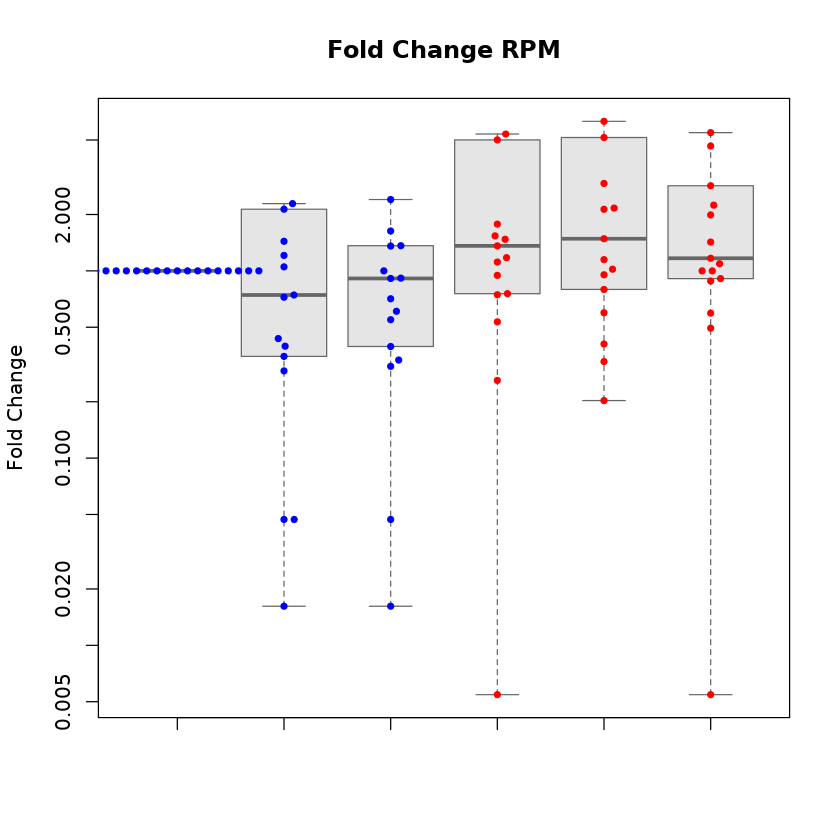

In [21]:
data <- read.csv(paste(results,"/RPMCOmparison/","rpm_hgtgtsHeatmap7.csv",sep=""), header = TRUE, row.names = 1, sep = ",")
data=data+1
# Calcolo del fold change tra DMSO Idelalisib e DMSO WT
foldChange_IDE_DMSO <- data[,"MEC.1_Idelalisib_DMSO"] / data[,"AID.WT_DMSO"]
foldChange_IDE_Taze <- data[,"MEC.1_Idelalisib_Tazemetostat"] / data[,"AID.WT_DMSO"]
foldChange_IDE_Vale <- data[,"MEC.1_Idelalisib_Valemetostat"] / data[,"AID.WT_DMSO"]
foldChange_AID_WT_Taze <- data[,"AID.WT_Tazemetostat"] / data[,"AID.WT_DMSO"]
foldChange_AID_WT_Vale <- data[,"AID.WT_Valemetostat"] / data[,"AID.WT_DMSO"]
dmso_WT = data[,"AID.WT_DMSO"] / data[,"AID.WT_DMSO"]
# Creazione della tabella con i fold change
foldChange_table <- data.frame(DMSO_WT=dmso_WT,Taze_WT=foldChange_AID_WT_Taze,Vale_WT=foldChange_AID_WT_Vale,DMSO_IDE = foldChange_IDE_DMSO, Taze_IDE = foldChange_IDE_Taze, Vale_IDE = foldChange_IDE_Vale)
colnames(foldChange_table)=c("DMSO","Tazemetostat","Valemetostat","Idelalisib","Idelalisib+Tazemetostat","Idelalisib+Valemetostat")

# Creazione del boxplot per i fold change
boxplot(foldChange_table, xaxt = "n", main = "Fold Change RPM", xlab = "", 
        ylab = "Fold Change", outline = FALSE, col = "gray90", border = "gray40",log="y")

# Aggiungi i puntini uno per uno, colorando in base alla condizione
# Aggiungi i puntini con beeswarm
for (i in 1:ncol(foldChange_table)) {
  color <- if (grepl("Idelalisib", colnames(foldChange_table)[i], ignore.case = TRUE)) "red" else "blue"
  
  beeswarm(foldChange_table[[i]], add = TRUE, at = i, 
           col = color, pch = 20, vertical = TRUE)
}


# Aggiungi le etichette ruotate
labels <- colnames(foldChange_table)
axis(1, at = 1:length(labels), labels = FALSE)
text(x = 1:length(labels), y = par("usr")[3] - 0.3, srt = 45, adj = 1,
     labels = labels, xpd = TRUE,cex = 0.6)#write.table(foldChange_table,paste(results,"/RPMCOmparison/","boxPlotCount5way.csv",sep=""),col.names=TRUE,row.names=FALSE,sep=",")

In [22]:
a <- read.csv(paste(results,"/RPMCOmparison/","count_hgtgts7.csv",sep=""), header = TRUE, row.names = 1, sep = ",")
conditions <- colnames(a)[-1]

# Inizializza un vettore per memorizzare i p-value
p_values <- numeric(length(conditions))


# Ciclo for per confrontare ogni condizione con AID_WT_DMSO e calcolare i p-value
for (i in 1:length(conditions)) {
  condition_of_interest <- a[, conditions[i]]
  reference_condition <- a$AID.WT_DMSO
  
  # Esegui il test t di Student per confrontare la condizione di interesse con la condizione di riferimento
  p_values[i] <- wilcox.test(condition_of_interest, reference_condition)$p.value
}

# Visualizza i p-value per ogni condizione
for (i in 1:length(conditions)) {
  cat("P-value for", conditions[i], "vs AID_WT_DMSO:", p_values[i], "\n")
}
 #Calcola il p-value per Idelalisib_Taze e Idelalisib_Vale rispetto a Idelalisib_DMSO
idelalisib_taze_p_value <- wilcox.test(a$MEC.1_Idelalisib_Tazemetostat, a$MEC.1_Idelalisib_DMSO)$p.value
idelalisib_vale_p_value <- wilcox.test(a$MEC.1_Idelalisib_Valemetostat, a$MEC.1_Idelalisib_DMSO)$p.value

# Aggiungi i p-value di Idelalisib_Taze e Idelalisib_Vale alla lista
p_values[["Idelalisib_Taze"]] <- idelalisib_taze_p_value
p_values[["Idelalisib_Vale"]] <- idelalisib_vale_p_value



# Visualizza i p-value per Idelalisib_Taze e Idelalisib_Vale
cat("P-value for Idelalisib_Taze vs Idelalisib_DMSO:", idelalisib_taze_p_value, "\n")
cat("P-value for Idelalisib_Vale vs Idelalisib_DMSO:", idelalisib_vale_p_value, "\n")

idelalisib_taze_p_value <- wilcox.test(a$MEC.1_Idelalisib_Tazemetostat, a$AID.WT_Tazemetostat)$p.value
idelalisib_vale_p_value <- wilcox.test(a$MEC.1_Idelalisib_Valemetostat, a$AID.WT_Valemetostat)$p.value
cat("P-value for Idelalisib_Taze vs WT Taze:", idelalisib_taze_p_value, "\n")
cat("P-value for Idelalisib_Vale vs WT Vale:", idelalisib_vale_p_value, "\n")

P-value for AID.WT_Tazemetostat vs AID_WT_DMSO: 0.9723711 
P-value for AID.WT_Valemetostat vs AID_WT_DMSO: 0.6524052 
P-value for MEC.1_AID.KO_DMSO23 vs AID_WT_DMSO: 0.0168623 
P-value for MEC.1_AID.KO_Tazemetostat57 vs AID_WT_DMSO: 0.04758363 
P-value for MEC.1_AID.KO_Valemetostat1011 vs AID_WT_DMSO: 0.02456249 
P-value for MEC.1_Idelalisib_DMSO vs AID_WT_DMSO: 0.1375916 
P-value for MEC.1_Idelalisib_Tazemetostat vs AID_WT_DMSO: 0.01561871 
P-value for MEC.1_Idelalisib_Valemetostat vs AID_WT_DMSO: 0.03496163 
P-value for Idelalisib_Taze vs Idelalisib_DMSO: 0.5120944 
P-value for Idelalisib_Vale vs Idelalisib_DMSO: 0.4274302 
P-value for Idelalisib_Taze vs WT Taze: 0.006710741 
P-value for Idelalisib_Vale vs WT Vale: 0.01627667 


In [23]:
data1=read.table(paste(results,"/RPMCOmparison/","DMSOrpm_FAIR7.csv",sep=""),header=TRUE,sep=",",row.names=1)
data2=read.table(paste(previousResults,"Database_annotated.csv",sep="/"),header=TRUE,sep=",")
newNames=c()
for(i in rownames(data1)){
    if(unique(data2[which(data2$hotspotID==i),"annotation"])=="NULL"){newNames=append(newNames,paste(unique(data2[which(data2$hotspotID==i),c("Chromosome","ChrStart","ChrEnd")]),collapse="_"))}else if(length(strsplit(unique(data2[which(data2$hotspotID==i),"annotation"]),"_")[[1]])>3){ 
        newNames=append(newNames,paste(unique(data2[which(data2$hotspotID==i),c("Chromosome","ChrStart","ChrEnd")]),collapse="_"))
    }
    else{
newNames=append(newNames,unique(data2[which(data2$hotspotID==i),"annotation"]))}
}
rownames(data1)=newNames
increased=which(data1$MEC.1_Idelalisib_DMSO - data1$AID.WT_DMSO>0)
print(length(increased)/nrow(data1))
print(paste(length(increased),"increased over",nrow(data1)))
write.table(data1[increased,],paste(results,"/RPMCOmparison/","DMSOrpm_FAIR_ANNOTATED7.csv",sep=""),col.names=NA,sep=",")


[1] 0.75
[1] "6 increased over 8"


In [68]:
data1

,AID.WT_DMSO,MEC.1_AID.KO_DMSO23,MEC.1_Idelalisib_DMSO
,<dbl>,<dbl>,<dbl>
ZNF268_ANHX,283.77995,40.88642,436.95757
chr2_88857470_88861556,60.80999,0.00000,331.48505
C8orf33,243.23996,0.00000,286.28255
ZNF595,202.69996,102.21604,271.21504
CHAMP1_LINC01054,222.96996,0.00000,210.94503
chr11_135055498_135075423,101.34998,61.32963,180.81003
IRF4,121.61998,61.32963,165.74253
RABL3,121.61998,102.21604,105.47252
chr2_46799107_46799362,0.00000,0.00000,105.47252


In [24]:
data1=read.table(paste(results,"/RPMCOmparison/","Tazerpm_FAIR7.csv",sep=""),header=TRUE,sep=",",row.names=1)
data2=read.table(paste(previousResults,"Database_annotated.csv",sep="/"),header=TRUE,sep=",")
newNames=c()
for(i in rownames(data1)){
    if(unique(data2[which(data2$hotspotID==i),"annotation"])=="NULL"){newNames=append(newNames,paste(unique(data2[which(data2$hotspotID==i),c("Chromosome","ChrStart","ChrEnd")]),collapse="_"))}else if(length(strsplit(unique(data2[which(data2$hotspotID==i),"annotation"]),"_")[[1]])>3){ 
        newNames=append(newNames,paste(unique(data2[which(data2$hotspotID==i),c("Chromosome","ChrStart","ChrEnd")]),collapse="_"))
    }
    else{
newNames=append(newNames,unique(data2[which(data2$hotspotID==i),"annotation"]))}
}
rownames(data1)=newNames
increased=which(data1$MEC.1_Idelalisib_Tazemetostat - data1$AID.WT_Tazemetostat	>0)
print(length(increased)/nrow(data1))
print(paste(length(increased),"increased over",nrow(data1)))
write.table(data1[increased,],paste(results,"/RPMCOmparison/","Tazerpm_FAIR_ANNOTATED7.csv",sep=""),col.names=NA,sep=",")


[1] 0.9090909
[1] "10 increased over 11"


In [25]:
data1=read.table(paste(results,"/RPMCOmparison/","Valerpm_FAIR7.csv",sep=""),header=TRUE,sep=",",row.names=1)
data2=read.table(paste(previousResults,"Database_annotated.csv",sep="/"),header=TRUE,sep=",")
newNames=c()
for(i in rownames(data1)){
    if(unique(data2[which(data2$hotspotID==i),"annotation"])=="NULL"){newNames=append(newNames,paste(unique(data2[which(data2$hotspotID==i),c("Chromosome","ChrStart","ChrEnd")]),collapse="_"))}else if(length(strsplit(unique(data2[which(data2$hotspotID==i),"annotation"]),"_")[[1]])>3){ 
        newNames=append(newNames,paste(unique(data2[which(data2$hotspotID==i),c("Chromosome","ChrStart","ChrEnd")]),collapse="_"))
    }
    else{
newNames=append(newNames,unique(data2[which(data2$hotspotID==i),"annotation"]))}
}
rownames(data1)=newNames
increased=which(data1$MEC.1_Idelalisib_Valemetostat - data1$AID.WT_Valemetostat>0)
print(length(increased)/nrow(data1))
print(paste(length(increased),"increased over",nrow(data1)))
write.table(data1[increased,],paste(results,"/RPMCOmparison/","Valerpm_FAIR_ANNOTATED7.csv",sep=""),col.names=NA,sep=",")


[1] 1
[1] "10 increased over 10"


In [ ]:
DMSO=1000
Taze=900

hotspot1Taze=5
hotspot1DMSO=9

In [12]:
5/9

[1] 0.5555556

In [13]:
(5/1000*1000000)/(9/900*1000000)

[1] 0.5